In [149]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
cwd = os.getcwd()

In [150]:
def bgr2rgb(bgr):
    return cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

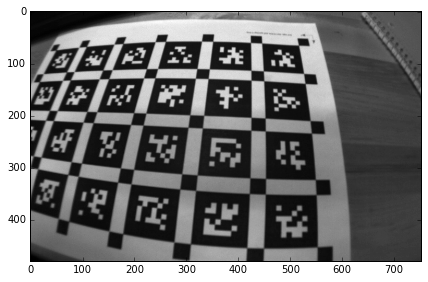

In [151]:
image = cv2.imread(os.path.join(cwd, 'frame0000.jpg'), cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(7, 7))
plt.imshow(gray, cmap=plt.cm.gray)

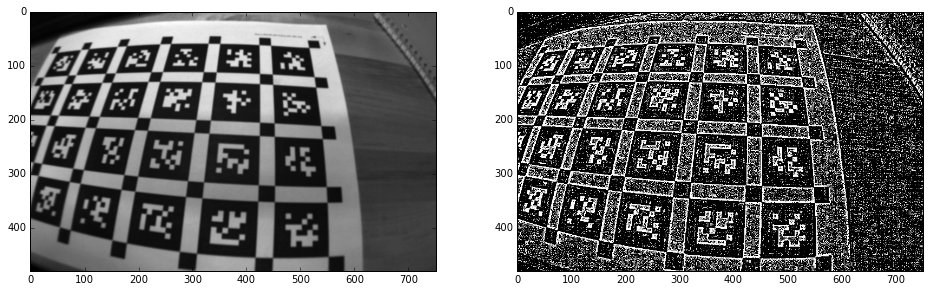

In [152]:
# Gaussian blur
blur = cv2.GaussianBlur(gray, (3, 3), 0.8)
         
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(121)
ax.imshow(blur, cmap=plt.cm.gray)
ax = fig.add_subplot(122)
ax.imshow(blur - gray, cmap=plt.cm.gray)

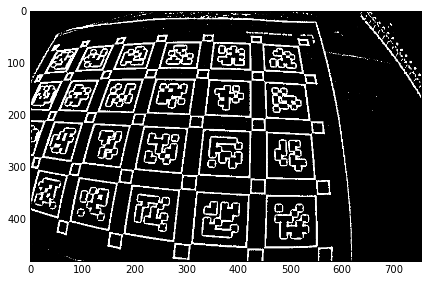

In [153]:
# Adaptive Threshold
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 5, 3)
plt.figure(figsize=(7, 7))
plt.imshow(thresh, cmap=plt.cm.gray)

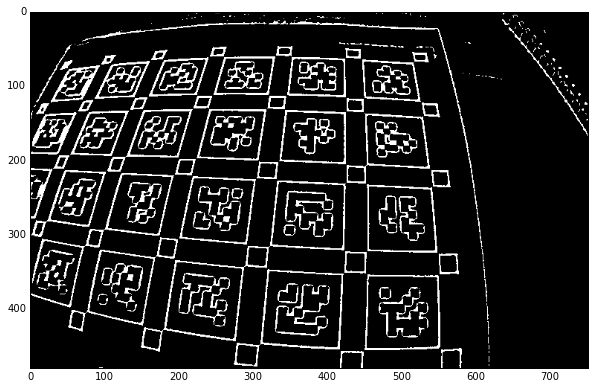

In [154]:
# Erode binary a bit
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
erosion = cv2.erode(thresh, kernel, iterations=1)
plt.figure(figsize=(10, 10))
plt.imshow(erosion, cmap=plt.cm.gray)

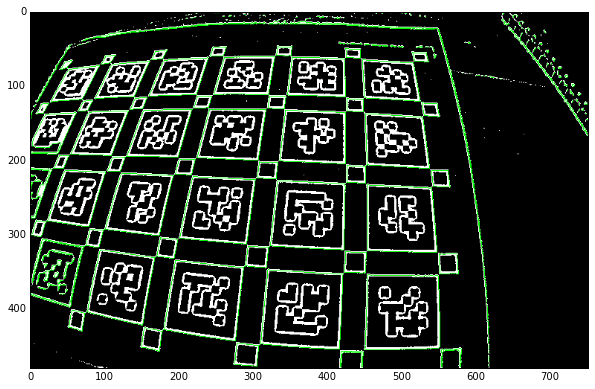

In [155]:
# Detect Rectangle
cs, _ = cv2.findContours(erosion, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)

disp = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
cv2.drawContours(disp, cs, -1, (0,255,0), 1)
plt.figure(figsize=(10, 10))
plt.imshow(disp)

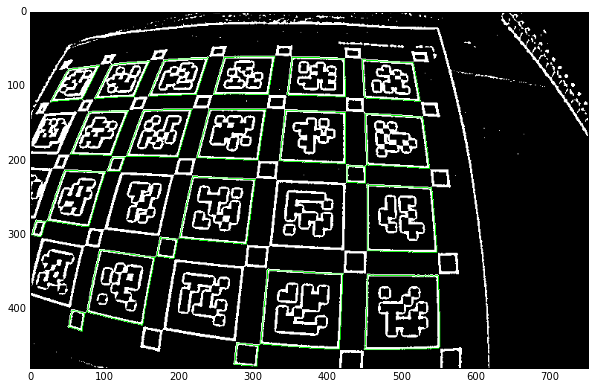

In [156]:
# Filter contours
good_cs = []
for cnt in cs:
    # Check length
    cnt_len = len(cnt)
    if cnt_len < 10 * 3 * 4:
        continue
    
    # Check square
    epsilon = 0.08 * cnt_len
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    if len(approx) != 4 or not cv2.isContourConvex(approx):
        continue
    
    good_cs.append(cnt)

disp = cv2.cvtColor(thresh, cv2.COLOR_GRAY2BGR)
cv2.drawContours(disp, good_cs, -1, (0,255,0), 1)
plt.figure(figsize=(10, 10))
plt.imshow(disp)